In [19]:
import pandas as pd
from collections import defaultdict
import json
from tqdm import tqdm
import matplotlib.pyplot as plt


In [20]:
DATA_FILE = "../rust_crawl/cache/state_debug/debug_data.jsonl"

all_data = defaultdict(lambda: defaultdict(list))

with open(DATA_FILE) as f:
    for line in f.readlines():
        try:
            line_data = json.loads(line)
            line_dtype = next(iter(line_data.keys()))
            line_data_vals = line_data[line_dtype]

            for k, v in line_data_vals.items():
                all_data[line_dtype][k].append(v)

        except json.decoder.JSONDecodeError:
            continue


print(f"{[k for k in all_data.keys()]=}")

[k for k in all_data.keys()]=['DocMetadata', 'Lingua']


In [21]:
lingua_data = pd.DataFrame(all_data["Lingua"])
doc_metadata = pd.DataFrame(all_data["DocMetadata"])

In [22]:
lingua_data

,predicted_dutch,dutch_confidence,confidences,has_dutch_lang_tag,is_dutch_url,text_length
0,True,1.000000,"{'TAGALOG': 0.9623409664653987, 'TSONGA': 0.95...",True,True,18543
1,True,1.000000,"{'AZERBAIJANI': 0.8225993501697481, 'MAORI': 0...",True,True,18543
2,False,0.000000,{'VIETNAMESE': 1.0},False,False,9968
3,False,0.862860,"{'SHONA': 0.9603150456394676, 'TSONGA': 0.9686...",False,False,11739
4,False,0.932303,"{'LATVIAN': 0.8397570248809836, 'AZERBAIJANI':...",False,False,12588
...,...,...,...,...,...,...
104521,True,1.000000,"{'DUTCH': 1.0, 'ESPERANTO': 0.9552081398192179...",True,False,75478
104522,False,0.936241,"{'SLOVENE': 0.895292745457039, 'GANDA': 0.8123...",False,False,129018
104523,False,0.956899,"{'DUTCH': 0.9568985345962745, 'SLOVENE': 0.896...",False,False,27522
104524,True,1.000000,"{'TURKISH': 0.848285680187868, 'MAORI': 0.8433...",False,True,66192


In [28]:
doc_metadata

,url,langs,urls
0,https://nl.wikipedia.org,[nl],[{'url': 'https://nl.wikipedia.org/wiki/Namibi...
1,https://hsb.wikipedia.org/wiki/H%C5%82owna_strona,[hsb],[{'url': 'https://hsb.wikipedia.org/wiki/Wikip...
2,https://ay.wikipedia.org/wiki/Nayriri_u%C3%B1s...,[ay],"[{'url': 'https://it.wikipedia.org/wiki/', 're..."
3,https://srn.wikipedia.org/wiki/Fesipapira,[srn],[{'url': 'https://sl.wikipedia.org/wiki/Glavna...
4,https://tay.wikipedia.org/wiki/T%E2%80%99ringa...,[tay],[{'url': 'https://tpi.wikipedia.org/wiki/Fran_...
...,...,...,...
65264,https://ijshockey.startpagina.nl/,[nl],"[{'url': 'http://www.totalsportsmgmt.com/', 'r..."
65265,http://sport.linkjespagina.nl,[nl],"[{'url': 'http://www.biketoday.com/', 'relativ..."
65266,https://shibatoto.com/,[en-US],"[{'url': 'https://139.59.253.253/', 'relative_..."
65267,https://www.joker7788.com/,[id-ID],[{'url': 'https://www.joker7788.com/link-login...


In [24]:
max_conf_is_dutch = []

for _, row in tqdm(lingua_data.iterrows(), total=len(lingua_data)):
    confidences = row["confidences"]

    if len(confidences) == 0:
        max_conf_is_dutch.append(False)
    else:

        max_conf = max(confidences.items(), key=lambda x: x[1])[0]
        max_conf_is_dutch.append(max_conf == "DUTCH")

lingua_data["max_conf_is_dutch"] = max_conf_is_dutch

100%|██████████| 104526/104526 [00:02<00:00, 38266.10it/s]


In [25]:
lingua_data

,predicted_dutch,dutch_confidence,confidences,has_dutch_lang_tag,is_dutch_url,text_length,max_conf_is_dutch
0,True,1.000000,"{'TAGALOG': 0.9623409664653987, 'TSONGA': 0.95...",True,True,18543,True
1,True,1.000000,"{'AZERBAIJANI': 0.8225993501697481, 'MAORI': 0...",True,True,18543,True
2,False,0.000000,{'VIETNAMESE': 1.0},False,False,9968,False
3,False,0.862860,"{'SHONA': 0.9603150456394676, 'TSONGA': 0.9686...",False,False,11739,False
4,False,0.932303,"{'LATVIAN': 0.8397570248809836, 'AZERBAIJANI':...",False,False,12588,False
...,...,...,...,...,...,...,...
104521,True,1.000000,"{'DUTCH': 1.0, 'ESPERANTO': 0.9552081398192179...",True,False,75478,True
104522,False,0.936241,"{'SLOVENE': 0.895292745457039, 'GANDA': 0.8123...",False,False,129018,False
104523,False,0.956899,"{'DUTCH': 0.9568985345962745, 'SLOVENE': 0.896...",False,False,27522,False
104524,True,1.000000,"{'TURKISH': 0.848285680187868, 'MAORI': 0.8433...",False,True,66192,True


<BarContainer object of 2 artists>

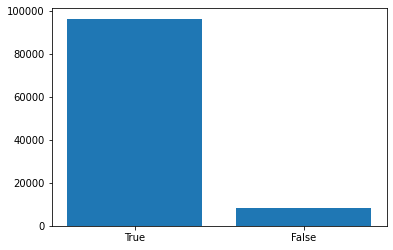

In [26]:
vals_pd = ((lingua_data["max_conf_is_dutch"] == lingua_data["has_dutch_lang_tag"]) | ~lingua_data["has_dutch_lang_tag"])
vals: list[bool] = vals_pd.to_list()

# true counts
true_count = sum(vals)

# false counts
false_count = len(vals) - true_count

# bar plot
plt.bar(["True", "False"], [true_count, false_count])


In [27]:
non_matching = lingua_data[~vals_pd]

non_matching

,predicted_dutch,dutch_confidence,confidences,has_dutch_lang_tag,is_dutch_url,text_length,max_conf_is_dutch
118,False,0.948677,"{'SWEDISH': 0.9477527392272067, 'BOKMAL': 0.93...",True,True,12203,False
137,False,0.948677,"{'HUNGARIAN': 0.8726435744193576, 'BOKMAL': 0....",True,True,12203,False
232,False,0.995088,"{'AFRIKAANS': 0.9779215804693698, 'ALBANIAN': ...",True,True,8713,False
238,False,0.995088,"{'IRISH': 0.8320704039433542, 'YORUBA': 0.9829...",True,True,8713,False
261,False,0.993102,"{'FINNISH': 0.8991550236645897, 'YORUBA': 1.0,...",True,False,9197,False
...,...,...,...,...,...,...,...
104433,False,0.976885,"{'DUTCH': 0.9768850103403799, 'SOTHO': 0.93445...",True,True,186814,False
104455,False,0.986810,"{'CZECH': 0.9132809888002845, 'ZULU': 0.882481...",True,True,112120,False
104457,False,0.987711,"{'CZECH': 0.9169015196010899, 'ICELANDIC': 0.8...",True,True,123163,False
104480,False,0.986810,"{'SOTHO': 0.9366393487754608, 'SLOVENE': 0.914...",True,True,112120,False
